Classification Accuracies:
Gamma      Train Accuracy  Validation Accuracy Test Accuracy  
0.1        0.94            0.93                0.90           
1          0.95            0.94                0.93           
10         0.96            0.94                0.92           
100        0.97            0.94                0.89           
1000       1.00            0.79                0.79           


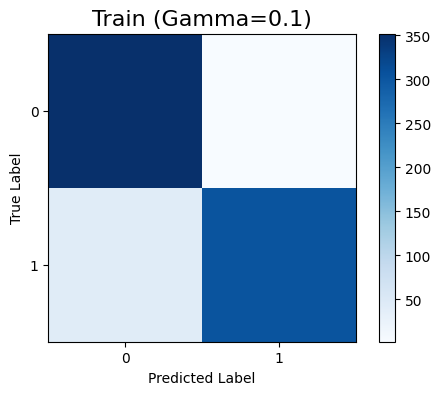

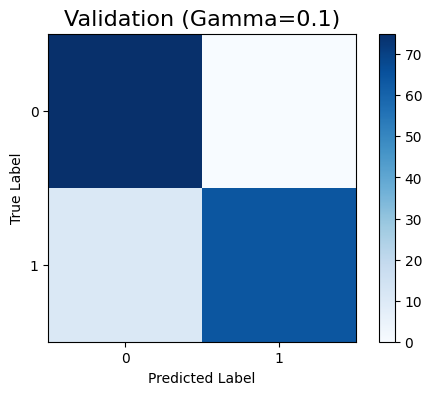

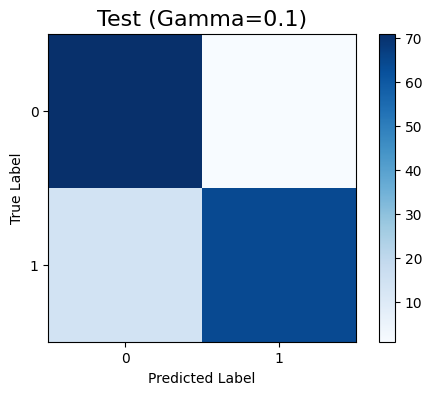

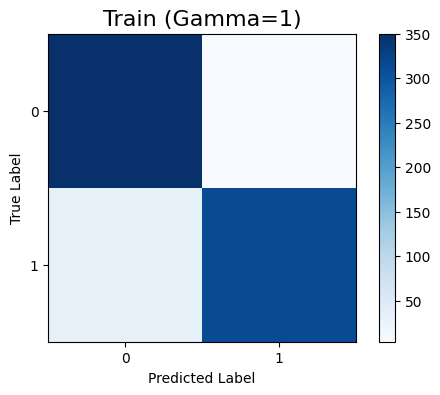

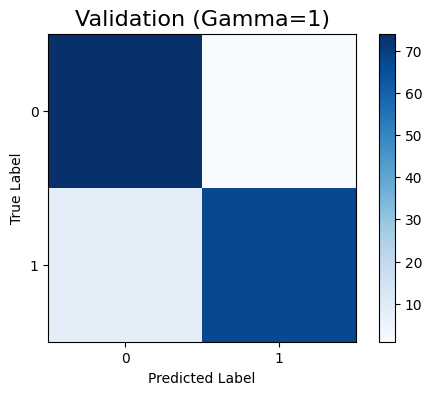

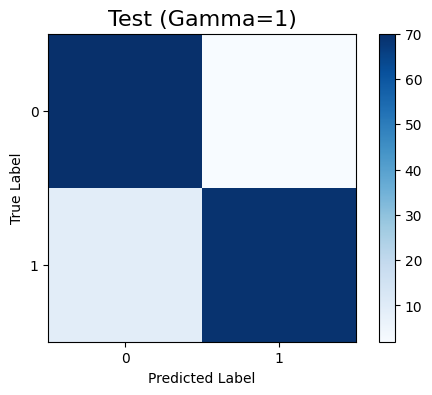

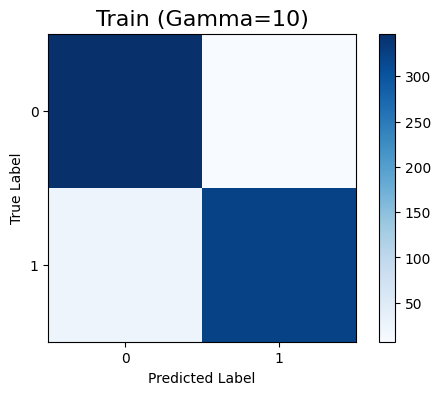

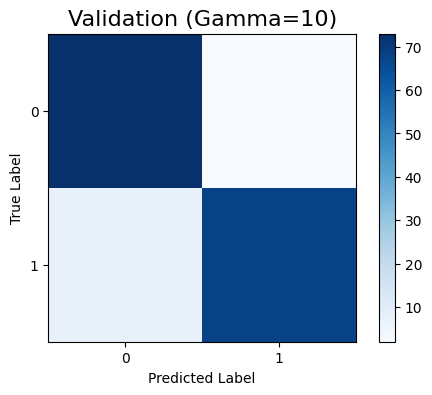

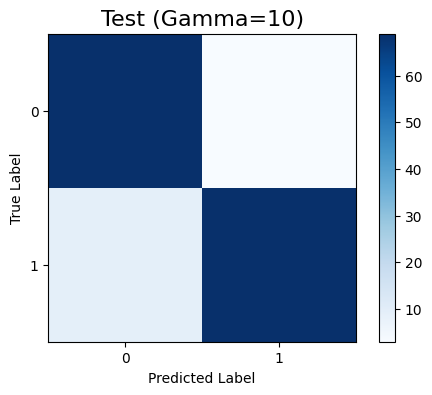

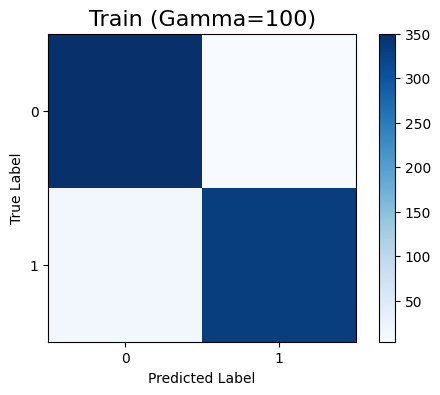

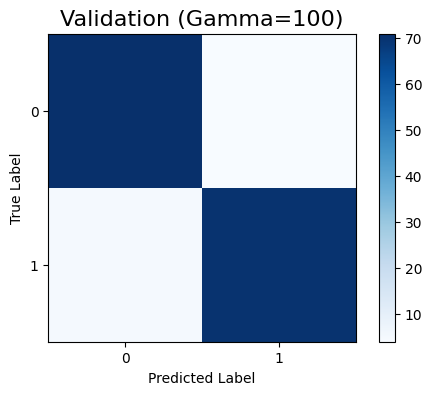

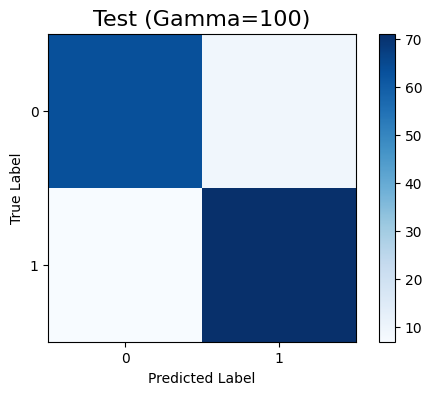

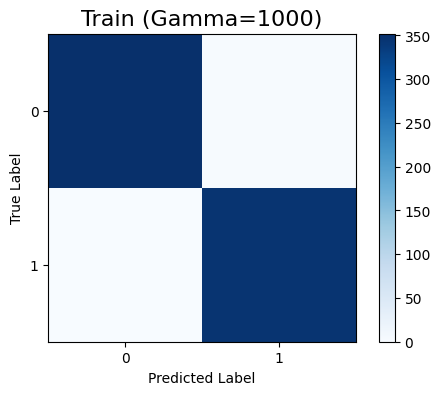

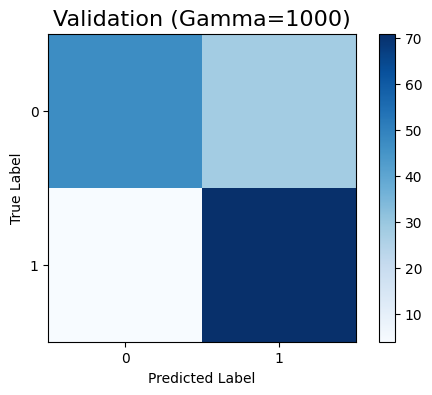

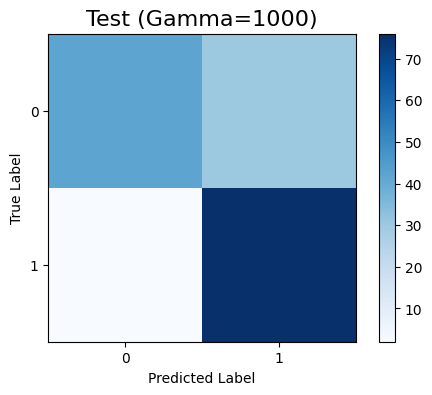

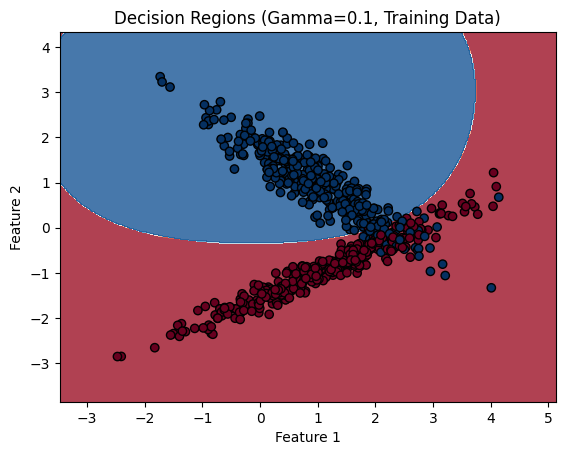

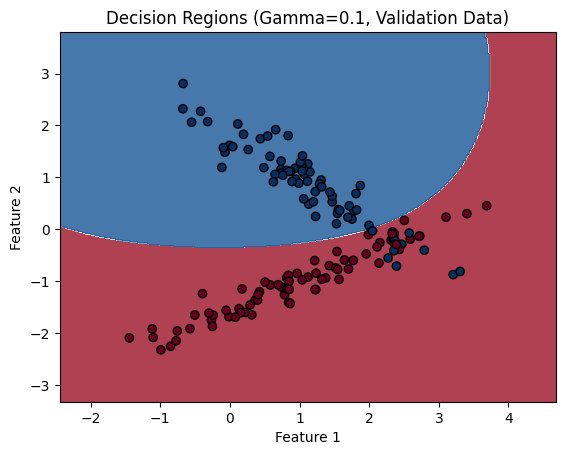

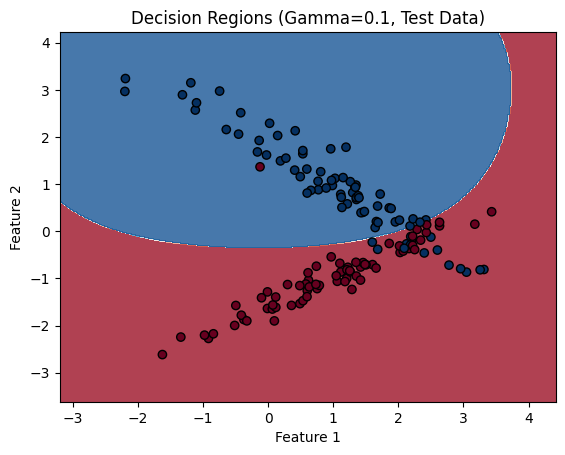

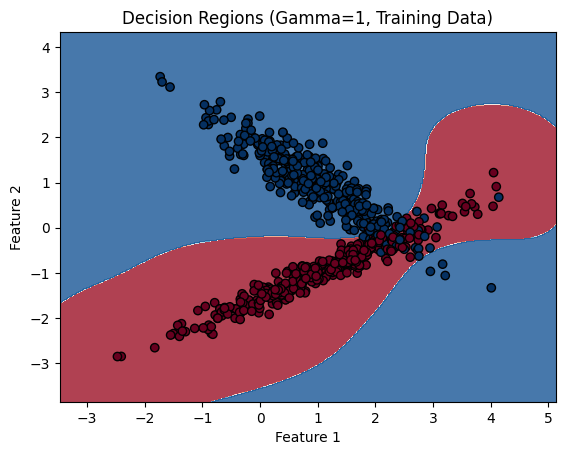

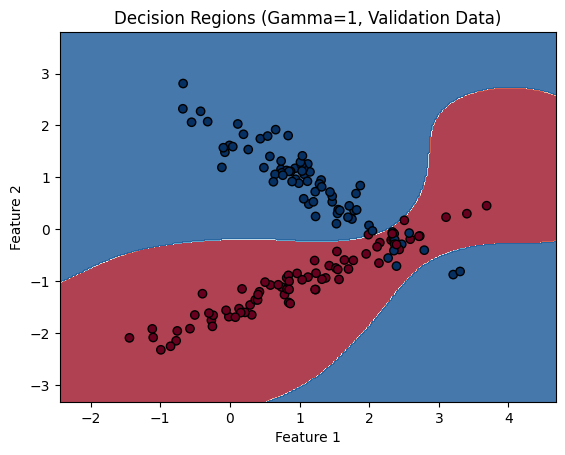

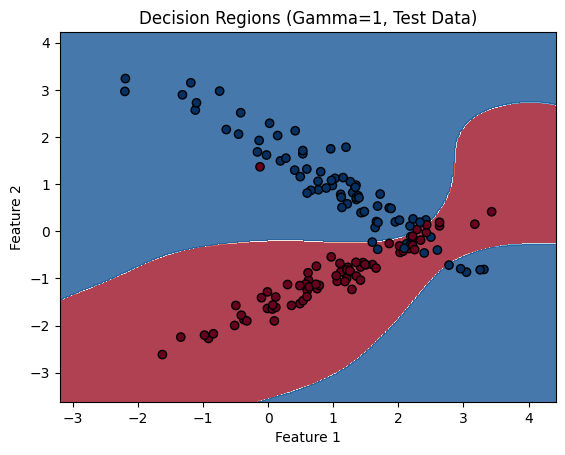

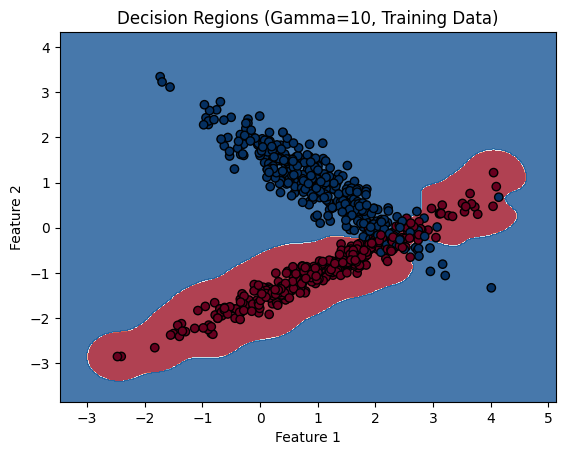

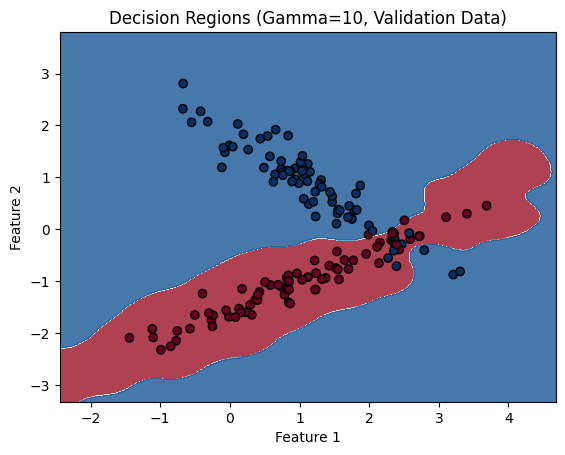

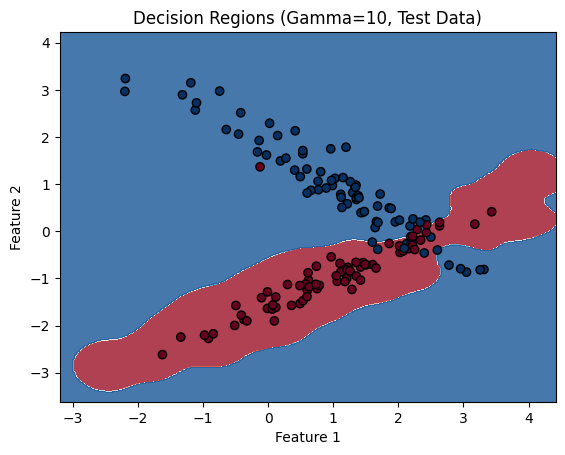

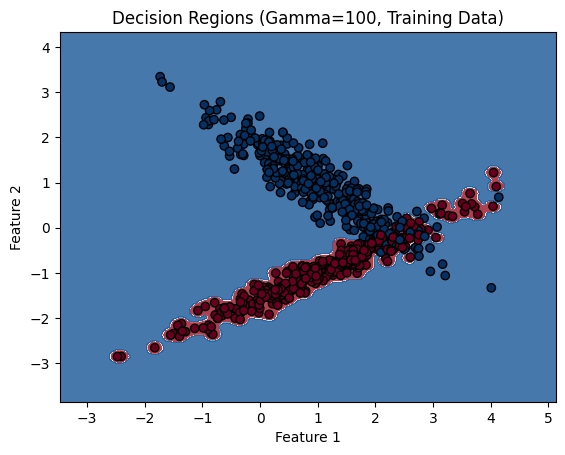

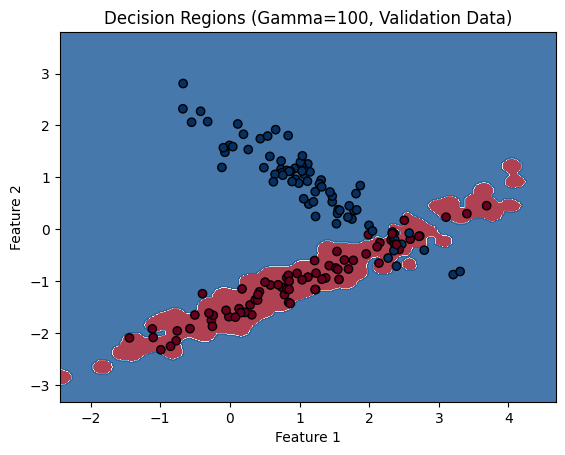

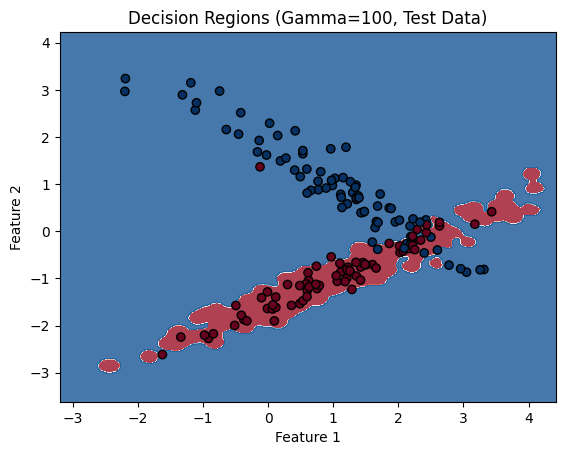

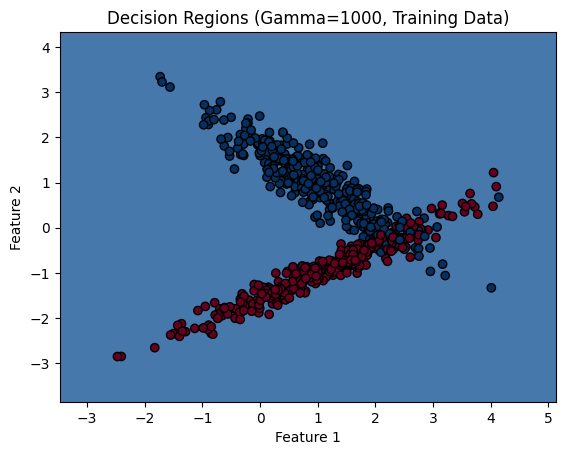

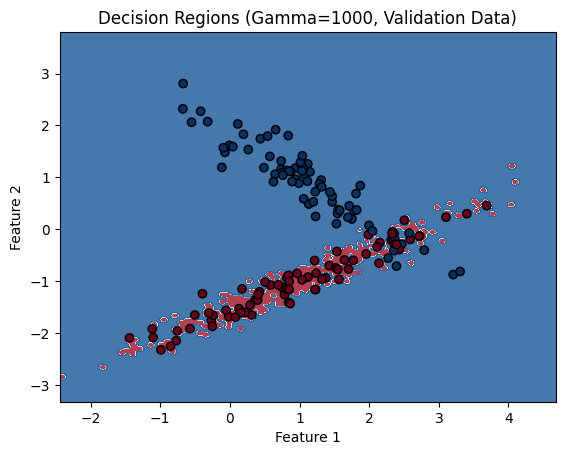

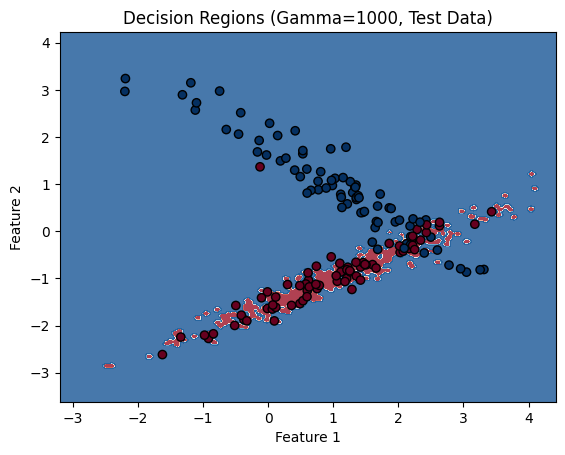

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Generate synthetic dataset
X, y = make_classification(n_samples=1000, n_features=2, n_classes=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Define different widths of Gaussian kernel (gamma)
gammas = [0.1, 1, 10, 100, 1000]

# Dictionary to store results
results = {}

# Function to evaluate the model and generate confusion matrix
def evaluate_model(model, X, y):
    # Predictions
    y_pred = model.predict(X)

    # Classification accuracy
    accuracy = accuracy_score(y, y_pred)

    # Confusion matrix
    cm = confusion_matrix(y, y_pred)

    return accuracy, cm

# Function to plot decision regions
def plot_decision_regions(X, y, model, title):
    h = 0.02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.8)

    # Plot the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu, edgecolors='k')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Loop over different widths of Gaussian kernel (gamma)
for gamma in gammas:
    # Train the SVM model
    model = SVC(kernel='rbf', gamma=gamma)
    model.fit(X_train, y_train)

    # Evaluate the model on training data
    train_accuracy, train_cm = evaluate_model(model, X_train, y_train)

    # Evaluate the model on validation data
    val_accuracy, val_cm = evaluate_model(model, X_val, y_val)

    # Evaluate the model on test data
    test_accuracy, test_cm = evaluate_model(model, X_test, y_test)

    # Store results
    results[gamma] = {
        'train_accuracy': train_accuracy,
        'val_accuracy': val_accuracy,
        'test_accuracy': test_accuracy,
        'train_cm': train_cm,
        'val_cm': val_cm,
        'test_cm': test_cm,
        'model': model
    }

# Print the table of classification accuracies
print("Classification Accuracies:")
print("{:<10} {:<15} {:<15} {:<15}".format("Gamma", "Train Accuracy", "Validation Accuracy", "Test Accuracy"))
for gamma, result in results.items():
    print("{:<10} {:<15.2f} {:<19.2f} {:<15.2f}".format(gamma, result['train_accuracy'], result['val_accuracy'], result['test_accuracy']))

# Plot confusion matrices
def plot_confusion_matrix(cm, accuracy, title):
    plt.figure(figsize=(6, 4))
    plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
    plt.title(title, fontsize=16)
    plt.colorbar()
    labels = ["0", "1"]
    plt.xticks(range(2), labels)
    plt.yticks(range(2), labels)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

for gamma, result in results.items():
    plot_confusion_matrix(result['train_cm'], result['train_accuracy'], title=f"Train (Gamma={gamma})")
    plot_confusion_matrix(result['val_cm'], result['val_accuracy'], title=f"Validation (Gamma={gamma})")
    plot_confusion_matrix(result['test_cm'], result['test_accuracy'], title=f"Test (Gamma={gamma})")

# Plot decision regions
for gamma, result in results.items():
    plot_decision_regions(X_train, y_train, result['model'], title=f"Decision Regions (Gamma={gamma}, Training Data)")
    plot_decision_regions(X_val, y_val, result['model'], title=f"Decision Regions (Gamma={gamma}, Validation Data)")
    plot_decision_regions(X_test, y_test, result['model'], title=f"Decision Regions (Gamma={gamma}, Test Data)")
